# 世界幸福度分析

In [46]:
# 数据整理
import numpy as np
import pandas as pd

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import nbformat
init_notebook_mode(connected=True)
plt.style.use('seaborn')


## 数据信息查看

In [47]:
#初步认识
df_all_raw = pd.read_csv('D:/学习资料/数据科学与工程导论/大作业/幸福度/upto2021.csv')  # df:Dataframe
df_all_raw.info()
df_all_raw.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,2065.000000,2073.000000,1873.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474,0.651421,0.270544,0.483914
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136,0.105954,0.085849,0.191515
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840,0.570057,0.207652,0.334808
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339,0.662837,0.260328,0.467046
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789,0.737176,0.321706,0.616302
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590,0.993604


In [48]:
df_all_raw

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Haiti,2006,3.754156,7.964181,0.693801,6.720000,0.449475,0.361143,0.853506,0.583196,0.332141,0.357021
1,Haiti,2008,3.846329,8.004622,0.679098,17.360001,0.464971,0.219059,0.811659,0.572523,0.255774,0.236633
2,Haiti,2010,3.765999,7.972780,0.554031,28.000000,0.372941,0.173648,0.848007,0.495069,0.292557,0.156371
3,Haiti,2011,4.844574,8.007442,0.567039,33.320000,0.412588,0.200928,0.681960,0.550258,0.244856,0.456668
4,Haiti,2012,4.413475,7.997653,0.748663,38.639999,0.482486,0.249091,0.717166,0.556583,0.283806,0.367327
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428,0.651242
2085,Hong Kong S.A.R. of China,2008,5.137262,10.815546,0.840222,NaN,0.922211,0.293682,0.273945,0.575073,0.236634,0.677437
2086,Hong Kong S.A.R. of China,2009,5.397056,10.788493,0.834716,NaN,0.918026,0.305077,0.272125,0.606459,0.210104,0.619142
2087,Hong Kong S.A.R. of China,2010,5.642835,10.846634,0.857314,NaN,0.890418,0.329340,0.255775,0.600561,0.183106,0.634737


数据集解释:\
**Country name:国家名**\
**year:年份**\
**`Life Ladder:幸福度`**\
测量方法：Please imagine a ladder, with steps numbered from 0 at the
bottom to 10 at the top. The top of the ladder represents the best possible life
for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this
time?" This measure is also referred to as Cantril life ladder, or just life ladder
in our analysis.\
**Log GDP per capita:对数人均生产总值**\
测试方法：The statistics of GDP per capita (variable name gdp) in purchasing power parity
(PPP) at constant 2017 international dollar prices are from the December 16,
2021 update of the World Development Indicators (WDI). The GDP figures for
Taiwan, Syria, Palestine, Venezuela, Djibouti and Yemen are from the Penn
World Table 10.0.\
**Social support:社会支持**\
测量方法：Social support (or having someone to count on in times of trouble) is the national
average of the binary responses (either 0 or 1) to the GWP question \If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?"\
**Healthy life expectancy at birth:健康预期寿命**\
测试方法：Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based
on the data extracted from the World Health Organization's (WHO) Global
Health Observatory data repository (Last updated: 2020-12-04). The data at
the source are available for the years 2000, 2010, 2015 and 2019. To match this
report's sample period (2005-2021), interpolation and extrapolation are used.\
**Freedom to make life choices:人生抉择自由**\
测量方法：Freedom to make life choices is the national average of responses to the GWP
question \Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?"\
**Generosity:社会慷慨程度**\
测量方法：Generosity is the residual of regressing national average of response to the GWP
question \Have you donated money to a charity in the past month?" on GDP
per capita.\
**Perceptions of corruption:社会清廉程度**\
测量方法：Corruption Perception: The measure is the national average of the survey re-
sponses to two questions in the GWP: \
Is corruption widespread throughout
the government or not" and \
Is corruption widespread within businesses or
not?" The overall perception is just the average of the two 0-or-1 responses. In
case the perception of government corruption is missing, we use the perception
of business corruption as the overall perception. The corruption perception at
the national level is just the average response of the overall perception at the
individual level.\
**Positive affect:积极影响**\
测量方法：Positive affect is defined as the average of three positive affect measures in
GWP: laugh, enjoyment and doing interesting things in the Gallup World Poll
waves 3-7. These measures are the responses to the following three questions,
respectively: \
Did you smile or laugh a lot yesterday?", and \
Did you experience
the following feelings during A LOT OF THE DAY yesterday? How about
Enjoyment?", \
Did you learn or do something interesting yesterday?"
{ In earlier rounds of World Happiness Reports, we used a slightly different
but highly correlated definition of positive affect (ρ = 0:94). It was defined
as the average of happiness, laugh and enjoyment in the Gallup World Poll
waves 3-7, where the happiness responses is the answer to the questions\
Did you experience the following feelings during A LOT OF THE DAY
yesterday? How about Happiness?" Waves 3-7 cover years 2008 to 2012
and a small number of countries in 2013. For waves 1-2 and those from
wave 8 on, positive affect is defined as the average of laugh and enjoyment
only, due to the limited availability of happiness.\
**Negative affect:**\
测量方法：Negative affect is defined as the average of three negative affect measures in
GWP. They are worry, sadness and anger, respectively the responses to \
Did
you experience the following feelings during A LOT OF THE DAY yesterday?
How about Worry?", \
Did you experience the following feelings during A LOT
OF THE DAY yesterday? How about Sadness?", and \
Did you experience the
following feelings during A LOT OF THE DAY yesterday? How about Anger?"\
**Confidence in national government:对政府信任程度**

In [49]:
#得到countryname_list
countryname_list = df_all_raw['Country name'].unique()
countryname_list=sorted(countryname_list)
print(countryname_list)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho

In [50]:
print("共统计了%d个国家"%len(countryname_list))
print('*'*20)
#得到幸福度影响因素列表
factors=list(df_all_raw.columns)
print("列名：")
print(factors)

共统计了166个国家
********************
列名：
['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government']


## 数据清洗

1. 数据去重

In [51]:
print("去重前")
print(df_all_raw.shape)
df_all_0=df_all_raw.drop_duplicates(subset=['Country name','year'])
print("去重后")
print(df_all_0.shape)
df_all_0.to_csv("df_all_0.csv")

去重前
(2089, 12)
去重后
(2089, 12)


In [52]:
df_all_0

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Haiti,2006,3.754156,7.964181,0.693801,6.720000,0.449475,0.361143,0.853506,0.583196,0.332141,0.357021
1,Haiti,2008,3.846329,8.004622,0.679098,17.360001,0.464971,0.219059,0.811659,0.572523,0.255774,0.236633
2,Haiti,2010,3.765999,7.972780,0.554031,28.000000,0.372941,0.173648,0.848007,0.495069,0.292557,0.156371
3,Haiti,2011,4.844574,8.007442,0.567039,33.320000,0.412588,0.200928,0.681960,0.550258,0.244856,0.456668
4,Haiti,2012,4.413475,7.997653,0.748663,38.639999,0.482486,0.249091,0.717166,0.556583,0.283806,0.367327
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428,0.651242
2085,Hong Kong S.A.R. of China,2008,5.137262,10.815546,0.840222,NaN,0.922211,0.293682,0.273945,0.575073,0.236634,0.677437
2086,Hong Kong S.A.R. of China,2009,5.397056,10.788493,0.834716,NaN,0.918026,0.305077,0.272125,0.606459,0.210104,0.619142
2087,Hong Kong S.A.R. of China,2010,5.642835,10.846634,0.857314,NaN,0.890418,0.329340,0.255775,0.600561,0.183106,0.634737


2. 数据排序

In [53]:
df_all_1 = df_all_0.sort_values(
    by=['Country name', 'year'])
df_all_1.index = range(0, 2089)
#df_all_1.to_csv("df_all_1.csv")

In [54]:
df_all_1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


### 3. 数据补全

处理部分缺失

In [55]:
# 一个国家一个国家地补全数据
df_country_list = []
for countryname in countryname_list:
    df_country = df_all_1.loc[df_all_1['Country name']
                              == countryname]
    # df_country.iloc[:,0].size是这个df的行数
    df_country.index = range(0, df_country.iloc[:,0].size)
    for factor in factors[2:]:
        df_country[factor] = df_country[factor].fillna(
            df_country[factor].mean())
    globals()[f"df_{countryname}"] = df_country
    df_country_list.append(df_country)
    df_country.to_csv(f"data_groupby_country/df_{countryname}.csv")

df_all_2 = pd.concat(df_country_list)
df_all_2.index=range(0,df_all_2.iloc[:,0].size)
df_all_2.to_csv("df_all_2.csv")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_58616\3660197409.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_58616\3660197409.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_58616\3660197409.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [56]:
df_all_2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


处理完全缺失

In [57]:
# 有些国家的有些指标一个数据也没有，所以上面一遍操作后也没被补全
# 再整个用平均值补全
df_all_3 = df_all_2.copy()
for factor in factors[2:]:
    df_all_3[factor] = df_all_3[factor].fillna(df_all_3[factor].mean())
df_all_3.index=range(0,df_all_3.iloc[:,0].size)
df_all_3.to_csv("df_all_3.csv")


In [58]:
df_all_3

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


### 4. 数据转换
把不同的国家名转换成数字以便后续分析国家这个变量与其它变量的相关性

In [59]:
df_all_4=df_all_3.copy()
i=1
for countryname in countryname_list:
    df_all_4.loc[df_all_4['Country name']==countryname,'Country name']=i 
    i+=1
df_all_4.info() #得知Country name类型为object,需要转换
df_all_4['Country name']=df_all_4['Country name'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2089 non-null   float64
 4   Social support                     2089 non-null   float64
 5   Healthy life expectancy at birth   2089 non-null   float64
 6   Freedom to make life choices       2089 non-null   float64
 7   Generosity                         2089 non-null   float64
 8   Perceptions of corruption          2089 non-null   float64
 9   Positive affect                    2089 non-null   float64
 10  Negative affect                    2089 non-null   float64
 11  Confidence in national government  2089 non-null   float

## 数据分析与可视化

### 1.各变量间相关性分析

In [60]:
factors1 = ['Life Ladder',
            'Country name',
            'year',
            'Log GDP per capita',
            'Social support',
            'Healthy life expectancy at birth',
            'Freedom to make life choices',
            'Generosity',
            'Perceptions of corruption',
            'Positive affect',
            'Negative affect']
#sns.pairplot(df_all_4,vars=factors1,kind='reg',diag_kind='hist')
#plt.savefig("./画图/pairplot1.png")

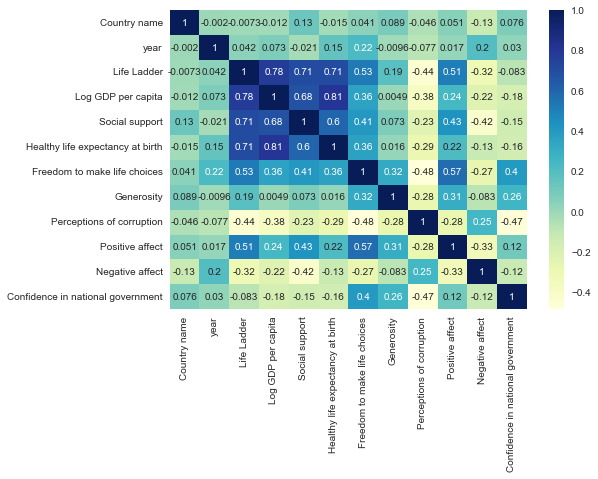

In [61]:
sns.heatmap(df_all_4.corr(), annot=True, cmap="YlGnBu");
plt.savefig("./画图/heatmap.png")

(相关系数：0.8以上高度相关； 0.5-0.8 中度相关； 0.3-0.5 低度相关； 小于0.3 极弱，可视为不相关。)

从上面两个图(尤其是相关系数表那幅)中我们可以看出：\
1.年份与除了自身外的因素的相关系数均小于0.3，可以认为年份对Life Ladder等指标几乎没影响，所以不需要分年份来进行分析\
2.Country name与除了自身外的因素均远远小于0.3，认为Country name对Life Ladder等指标没影响，所以不需要分国家来进行分析\
3.Life Ladder(幸福度)与Log GDP per capita,Social support,Healthy life expectancy at birth高度正相关，与Freedom to make life choices,Positive affect中度正相关，与Perceptions of corruption,Negative affect中度负相关，与year,Country name,Generosity,Confidence in national government几乎无关\
4.Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth这几个指标两两间的相关性都很高

### 2.用线性回归模型拟合数据

In [62]:
#回归模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [63]:
x = df_all_4[[column for column in ['Log GDP per capita',
                                    'Social support',
                                    'Healthy life expectancy at birth',
                                    'Freedom to make life choices',
                                    'Perceptions of corruption',
                                    'Positive affect',
                                    'Negative affect',
                                    ]]]
#既然Life Ladder(幸福度)与year,Country name,Generosity,Confidence in national government几乎无关，那么预测模型里不用这几个参数
y = df_all_4['Life Ladder']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True)  # shuffle参数用于“洗牌”，打乱原始的数据行排列顺序
print('全体数据量：', len(x))
print('训练集数据量：', len(x_train))
print('测试集数据量：', len(x_test))


全体数据量： 2089
训练集数据量： 1671
测试集数据量： 418


In [64]:
model=LinearRegression()
model.fit(x_train,y_train)
y_test_predict=model.predict(x_test)
mse=mean_squared_error(y_test,y_test_predict)
print("%0.2f"%mse)

0.29


拟合出的线性回归模型时mse较小，但mse与数据取值范围相关，不能单凭mse判断模型的准确程度

In [65]:
r2=r2_score(y_test,y_test_predict)
print(r2)

0.7700766885150759


我们采用判定系数来衡量模型的准确度，此处判定系数接近0.8，表明模型的准确度高，可以用于预测幸福度

In [66]:
model.coef_

array([ 0.37544935,  1.87352459,  0.02849311,  0.53045315, -0.60620074,
        2.24988852, -0.12408741])

In [67]:
model.intercept_

-2.744711029852029

最后得出的拟合公式为：\
$
Life\ Ladder=0.37544935*Log\ GDP\ per\ capita+1.87352459*Social\ support+
0.02849311*Healthy\ life\ expectancy\ at\ birth+0.53045315*Freedom\ to\ make\ life\ choices-0.60620074*Perceptions\ of\ corruption+ 2.24988852*Positive\ affect-0.12408741*Negative\ affect-2.744711029852029
$

###  3.画出2021年世界幸福度地图

#### 1.得到2005-2021的分年份dataframe

1. 方一

In [68]:
# for year in range(2005,2022):
#     df='df_'+str(year)
#     df=df_all.loc[df_all['year']==year].reset_index()
#     df.to_csv(f"df_{year}.csv")

2. 方二

In [69]:
dfyear_list = []
for i in range(2005, 2022):
    dfyear_list.append('df_'+ str(i))
print(dfyear_list)

['df_2005', 'df_2006', 'df_2007', 'df_2008', 'df_2009', 'df_2010', 'df_2011', 'df_2012', 'df_2013', 'df_2014', 'df_2015', 'df_2016', 'df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2021']


In [70]:
for i in range(2005, 2022):
    #exec函数能执行函数中" "内的操作
    exec("%s = df_all_3.loc[df_all_3['year']==%d]" %(dfyear_list[i-2005],i))
    exec("%s.index=range(0,%s.iloc[:,0].size)"%(dfyear_list[i-2005],dfyear_list[i-2005]))
    exec("%s.to_csv('data_groupby_year/%s')"%(dfyear_list[i-2005], 'df_'+str(i)+'.csv'))

In [71]:
df_2021 #别在意这个warning

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2021,2.436034,7.583020,0.454175,54.549999,0.394306,0.075328,0.946299,0.178886,0.606713,0.255620
1,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
2,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,0.494189
3,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
4,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
...,...,...,...,...,...,...,...,...,...,...,...,...
114,Uzbekistan,2021,6.185308,8.941695,0.895504,65.300003,0.927415,0.188775,0.661562,0.698459,0.232672,0.912673
115,Venezuela,2021,5.107553,8.588995,0.812418,64.050003,0.595620,-0.096557,0.823898,0.697587,0.389351,0.175912
116,Vietnam,2021,5.540250,9.028702,0.799494,65.500000,0.896800,0.126362,0.797788,0.650598,0.280437,0.848363
117,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678


3. 方三

In [72]:
# #一个一个写
# df_2005=df_all.loc[df_all['year']==2005].reset_index()
# df_2005.to_csv("2005.csv")

# df_2006=df_all.loc[df_all['year']==2006].reset_index()
# df_2006.to_csv("2006.csv")

# df_2007=df_all.loc[df_all['year']==2007].reset_index()
# df_2007.to_csv("2007.csv")

4. 方四 

In [73]:
# #用globals()[]或者locals()[]
# for year in range(2005,2022):
#     # Filter the original DataFrame by the current year
#     current_df = df_all.loc[df_all['year'] == year].reset_index()

#     # Save the current DataFrame with the name "df_<year>"
#     globals()[f"global_{year}"] = current_df
    
#     # Save the result in csv
#     current_df.to_csv(f"global_{year}.csv")
# global_2005

In [74]:
# #用globals()[]或者locals()[]
# for year in range(2005,2022):
#     # Filter the original DataFrame by the current year
#     current_df = df_all.loc[df_all['year'] == year].reset_index()

#     # Save the current DataFrame with the name "df_<year>"
#     locals()[f"local_{year}"] = current_df
    
#     # Save the result in csv
#     current_df.to_csv(f"local_{year}.csv")
# local_2005

#### 2.画出幸福度世界地图

In [75]:
data = dict(type = 'choropleth', 
           locations = df_2021['Country name'],
           locationmode = 'country names',
           colorscale = 'RdYlGn',
           z = df_2021['Life Ladder'], 
           text = df_2021['Country name'],
           colorbar = {'title':'happiness'})

layout = dict(title = 'Geographical Visualization of Happiness Score in 2021', 
              geo = dict(showframe = False))

choromap3 = go.Figure(data = [data], layout=layout)
#plot(choromap3, filename='画图/世界幸福度地图.html')

可以看出:\
1.北欧的幸福度最高；欧洲，北美洲，大洋洲的幸福度普遍很高\
2.西亚(除开阿拉伯半岛)、南亚地区，非洲地区(除开靠近好望角的南非)的幸福度普遍偏低\
3.中亚，东亚，北亚，东南亚，以及南美洲幸福度良好

### 4.幸福度排名最靠前与最靠后的国家

#### 4.1幸福度排名最靠前国家

2021年幸福度排名前十位

In [76]:
df_2021_sorted=df_2021.sort_values(by='Life Ladder',ascending=False)
top10=df_2021_sorted.head(10)[['Country name','Life Ladder']] 
top10.index=range(1,top10.iloc[:,0].size+1)
top10
 

,Country name,Life Ladder
1,Finland,7.794378
2,Denmark,7.698747
3,Israel,7.577528
4,Iceland,7.564625
5,Sweden,7.439280
6,Norway,7.361574
7,Switzerland,7.327672
8,Netherlands,7.314151
9,New Zealand,7.136701
10,Australia,7.111599


In [77]:
fig = px.bar(top10, 
             x="Country name", 
             y="Life Ladder", 
             color="Country name", 
             title="World's happiest countries in 2021")
fig.show()

2005-2021幸福度排名榜首的国家

In [78]:
top_country_list = []
for i in range(2005, 2022):
    # exec函数能执行函数中" "内的操作
    exec("top_country=%s.sort_values(by=['Life Ladder'],ascending=False)"%dfyear_list[i-2005])
    exec("top_country=top_country.iloc[0,0:3]")
    top_country_list.append(top_country)

df_topcountry = pd.DataFrame(top_country_list)

In [79]:
df_topcountry.index = range(0, df_topcountry.iloc[:,0].size)
df_topcountry

,Country name,year,Life Ladder
0,Denmark,2005,8.018934
1,Finland,2006,7.672449
2,Denmark,2007,7.834233
3,Denmark,2008,7.970892
4,Denmark,2009,7.683359
5,Denmark,2010,7.770515
6,Denmark,2011,7.788232
7,Switzerland,2012,7.776209
8,Canada,2013,7.593794
9,Denmark,2014,7.507559


可以看出Finland与Denmark各当过7次第一

2005-2021平均幸福度最高的国家

In [80]:
print("世界各国的幸福度平均值从高到低排列：")
df_all_1.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False)

世界各国的幸福度平均值从高到低排列：


Country name
Denmark                     7.681457
Finland                     7.611299
Switzerland                 7.528177
Norway                      7.498840
Iceland                     7.459697
                              ...   
Togo                        3.603208
Burundi                     3.548124
Central African Republic    3.514954
Afghanistan                 3.505506
South Sudan                 3.401875
Name: Life Ladder, Length: 166, dtype: float64

可以看出2005-2021平均幸福度最高的国家是Denmark，最低的是South Sudan

#### 4.2幸福度排名最靠后国家

2021年幸福度倒数前10的国家

In [81]:
df_2021_sorted=df_2021.sort_values(by='Life Ladder',ascending=True)
btm10=df_2021_sorted.head(10)[['Country name','Life Ladder']] #btm是bottom的缩写 
btm10.index=range(1,top10.iloc[:,0].size+1)   
btm10

,Country name,Life Ladder
1,Lebanon,2.178809
2,Afghanistan,2.436034
3,Zambia,3.082155
4,Zimbabwe,3.154578
5,India,3.558254
6,Malawi,3.635283
7,Tanzania,3.680568
8,Sierra Leone,3.714294
9,Jordan,3.909149
10,Egypt,4.025748


In [82]:
fig = px.bar(btm10, 
             x="Country name", 
             y="Life Ladder", 
             color="Country name", 
             title="World's least happiest countries in 2021")
fig.show()

历年幸福度排名最靠后国家

In [83]:
btm_country_list = []
for i in range(2005, 2022):
    # exec函数能执行函数中" "内的操作
    exec("btm_country=%s.sort_values(by=['Life Ladder'],ascending=True)"%dfyear_list[i-2005])
    exec("btm_country=btm_country.iloc[0,0:3]")
    btm_country_list.append(btm_country)

df_btmcountry = pd.DataFrame(btm_country_list)

In [84]:
df_btmcountry.index = range(0, df_btmcountry.iloc[:,0].size)
df_btmcountry

,Country name,year,Life Ladder
0,Turkey,2005,4.718734
1,Togo,2006,3.202429
2,Zimbabwe,2007,3.280247
3,Togo,2008,2.807855
4,Tanzania,2009,3.407508
5,Tanzania,2010,3.229129
6,Togo,2011,2.936221
7,Syria,2012,3.164491
8,Syria,2013,2.687553
9,Togo,2014,2.838959


可以看出Togo排过4次倒数第一

### 5.分析中国的幸福度排名

In [85]:
China_rank_list=[]
for i in range(2005, 2022):
    # exec函数能执行函数中" "内的操作
    exec("dfbyyear_sort=%s.sort_values(by=['Life Ladder'],ascending=False)"%dfyear_list[i-2005])
    dfbyyear_sort.index=range(1,dfbyyear_sort.iloc[:,0].size+1)
    exec("series_china=dfbyyear_sort.loc[dfbyyear_sort['Country name']=='China']")
    China_rank_list.append(series_china)

df_China_rank = pd.concat(China_rank_list)
df_China_rank

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
65,China,2006,4.560495,8.696139,0.747011,65.660004,0.848398,-0.158575,0.739114,0.657659,0.169580,0.494189
70,China,2007,4.862862,8.823968,0.810852,65.919998,0.848398,-0.176961,0.739114,0.663977,0.158614,0.494189
71,China,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.093270,0.739114,0.705133,0.146963,0.494189
94,China,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.161358,0.739114,0.669666,0.161650,0.494189
92,China,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.134285,0.739114,0.658101,0.158100,0.494189
80,China,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.187382,0.739114,0.710055,0.133503,0.494189
82,China,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.185606,0.739114,0.689160,0.158703,0.494189
71,China,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.158647,0.739114,0.717136,0.142211,0.494189
82,China,2014,5.195619,9.380201,0.820366,67.739998,0.848398,-0.217615,0.739114,0.709763,0.111518,0.494189
74,China,2015,5.303878,9.442431,0.793734,68.000000,0.848398,-0.245284,0.739114,0.666827,0.171315,0.494189


C:\Users\Administrator\AppData\Local\Temp\ipykernel_58616\3645827521.py:7: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.



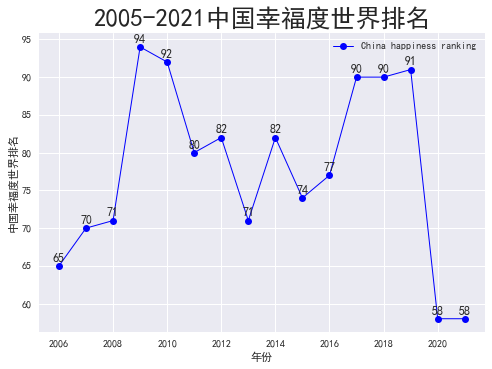

In [86]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文

x_axis_data = df_China_rank['year']
y_axis_data = df_China_rank.index

# plot中参数的含义分别是横轴值，纵轴值，线条格式，颜色，透明度,线的宽度和标签
plt.plot(x_axis_data, y_axis_data, 'ro-', color='blue',
         alpha=1, linewidth=1, label='China happiness ranking')
 
# 给这个折线图中的点加数据标签
for x, y in zip(x_axis_data, y_axis_data):
    plt.text(x, y+0.3, '%.0f'%y, ha='center', va='bottom', fontsize=12)
    # Add the text *s* to the Axes at location *x*, *y*(x,y)
 
# 显示标签，如果不加这句，即使加了label='一些数字'的参数，最终还是不会显示标签
plt.legend(loc="best")
plt.xlabel('年份')
plt.ylabel('中国幸福度世界排名')
plt.title("2005-2021中国幸福度世界排名", fontdict={'size': 25})
plt.show()

可以看出中国的世界幸福度排名在58名与94名间波动，2020年幸福度排名忽然从91名上升到了58名

### 6.求中国各项指标与世界平均水平的差，分析中国最容易在哪个方面做出提升来提高幸福度

这里我们用未补全的原始数据来分析（注意原始数据里中国的Perceptions of corruption与Confidence in national government是没有一个数据的，但在df_all_3里不分国家补全数据时给中国的这两个指标赋予了一个世界平均值）

In [87]:
df_China_raw=df_all_raw.loc[df_all_raw['Country name']=="China"]
df_China_raw

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
1143,China,2006,4.560495,8.696139,0.747011,65.660004,NaN,NaN,NaN,0.657659,0.169580,NaN
1193,China,2007,4.862862,8.823968,0.810852,65.919998,NaN,-0.176961,NaN,0.663977,0.158614,NaN
1232,China,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.093270,NaN,0.705133,0.146963,NaN
1273,China,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.161358,NaN,0.669666,0.161650,NaN
1322,China,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.134285,NaN,0.658101,0.158100,NaN
1365,China,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.187382,NaN,0.710055,0.133503,NaN
1414,China,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.185606,NaN,0.689160,0.158703,NaN
1438,China,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.158647,NaN,0.717136,0.142211,NaN
1470,China,2014,5.195619,9.380201,0.820366,67.739998,NaN,-0.217615,NaN,0.709763,0.111518,NaN
1491,China,2015,5.303878,9.442431,0.793734,68.000000,NaN,-0.245284,NaN,0.666827,0.171315,NaN


In [88]:
world_mean=df_all_1.mean()
China_mean=df_China_raw.mean()
print("世界平均水平：")
print(world_mean)
print('中国平均水平：')
print(China_mean)
print()

世界平均水平：
year                                 2013.727621
Life Ladder                             5.473747
Log GDP per capita                      9.378408
Social support                          0.811542
Healthy life expectancy at birth       63.180326
Freedom to make life choices            0.745462
Generosity                              0.000102
Perceptions of corruption               0.746474
Positive affect                         0.651421
Negative affect                         0.270544
Confidence in national government       0.483914
dtype: float64
中国平均水平：
year                                 2013.500000
Life Ladder                             5.098935
Log GDP per capita                      9.307982
Social support                          0.789159
Healthy life expectancy at birth       67.432813
Freedom to make life choices            0.848398
Generosity                             -0.158575
Perceptions of corruption                    NaN
Positive affect                       

C:\Users\Administrator\AppData\Local\Temp\ipykernel_58616\2535070579.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_58616\2535070579.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [89]:
gap=China_mean-world_mean 
print("中国各项指标平均值-世界平均水平：")
gap

中国各项指标平均值-世界平均水平：


year                                -0.227621
Life Ladder                         -0.374812
Log GDP per capita                  -0.070427
Social support                      -0.022383
Healthy life expectancy at birth     4.252487
Freedom to make life choices         0.102936
Generosity                          -0.158677
Perceptions of corruption                 NaN
Positive affect                      0.039517
Negative affect                     -0.102264
Confidence in national government         NaN
dtype: float64

可以看出：\
1.中国在2005-2021年的平均幸福度低于世界平均水平\
2.好的方面：中国的Healthy life expectancy at birth,Freedom to make life choices,Positive affect高于平均水平，Negative affect低于世界平均水平(注意Negative affect与幸福度是负相关的\
3.待提升方面：中国的Log GDP per capita,Social support,Generosity低于世界平均水平

结合之前拟合的幸福度线性回归模型的权重来判断中国最容易从哪些方面下手提升整体幸福度\
假设：只考虑去提升中国低于世界平均水平的指标，并且认为这些指标与世界平均水平差距越大，提升的空间越大，再用这一差距去乘之前回归模型里的权重，就可以粗略地得到中国最容易从哪些方面下手提升整体幸福度

$
Life\ Ladder=0.34*Log\ GDP\ per\ capita+2.10*Social\ support+
0.03*Healthy\ life\ expectancy\ at\ birth+0.45*Freedom\ to\ make\ life\ choices-0.67*Perceptions\ of\ corruption+2.33*Positive\ affect-0.08*Negative\ affect-2.86
$

中国需要提升的有Log GDP per capita,Social support,Generosity；而Generosity对幸福度影响太小以致回归模型里没考虑它。所以只需比较Log GDP per capita,Social support中更应该提升哪个

In [91]:
w = [0.37544935, 1.87352459] #Log GDP per capita,Social support的权重
gap1=[-0.070427,-0.022383] #中国在Log GDP per capita,Social support上与世界平均水平的差
wgap=[] #wgap是加权过的gap
for i in range(2):
    wgap.append(w[i]*gap1[i])
wgap

[-0.02644177137245, -0.04193510089797]

根据这个粗略的分析，可以看出中国最容易通过提升Social support值来提升整体幸福度

# 变量及数据集解释
df_all_raw和upto2022.csv:raw data\
df_all_0:去重后的数据\
df_all_1:在之前基础上排序后的数据\
df_all_2:在之前基础上`分国家`补全了Life Ladder及其以后的列\
df_all_3:在之前基础上`不分国家`地用平均值补全了Life Ladder及其以后的列\
df_all_4:在之前基础上把Country name的字符串序列换成了[1,2...166]